In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [240]:
# Liste des tickers ou indices avec leurs noms de fichiers associés
tickers_files = {
    "Aluminum": r"Data\Data daily\Bloomberg Aluminum - Données Historiques.csv",
    "Brent Crude": r"Data\Data Daily\Bloomberg Brent Crude - Données Historiques.csv",
    "Coffee": r"Data\Data daily\Bloomberg Coffee - Données Historiques.csv",
    "Copper": r"Data\Data daily\Bloomberg Copper - Données Historiques.csv",
    "Corn": r"Data\Data daily\Bloomberg Corn - Données Historiques.csv",
    "Cotton": r"Data\Data daily\Bloomberg Cotton - Données Historiques.csv",
    "Gold": r"Data\Data daily\Bloomberg Gold - Données Historiques.csv",
    "Lean Hogs": r"Data\Data daily\Bloomberg Lean Hogs - Données Historiques.csv",
    "Petroleum": r"Data\Data Daily\Bloomberg Petroleum - Données Historiques.csv",
    "Silver": r"Data\Data daily\Bloomberg Silver - Données Historiques.csv",
    "Soybeans": r"Data\Data daily\Bloomberg Soybeans - Données Historiques.csv",
    "Sugar": r"Data\Data daily\Bloomberg Sugar - Données Historiques.csv",
    "Wheat": r"Data\Data daily\Bloomberg Wheat - Données Historiques.csv",
    "WTI Crude Oil": r"Data\Data daily\Bloomberg WTI Crude Oil - Données Historiques.csv",   
}

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Importer chaque fichier et le stocker dans un DataFrame
for ticker, file in tickers_files.items():
    df = pd.read_csv(file)
    dataframes[ticker] = df

# Afficher les premiers enregistrements de chaque DataFrame pour vérifier
for ticker, df in dataframes.items():
    print(f"DataFrame pour {ticker}:")
    print(df.head())
    print("\n")

DataFrame pour Aluminum:
         Date  Dernier     Ouv.  Plus Haut Plus Bas  Vol. Variation %
0  08/11/2024  32,1511  33,1828    33,2290  32,0999   NaN      -2,77%
1  07/11/2024  33,0657  32,3429    33,4966  32,3091   NaN       3,03%
2  06/11/2024  32,0945  32,2537    32,5237  31,5357   NaN      -1,74%
3  05/11/2024  32,6630  32,3368    32,6997  32,2507   NaN       1,53%
4  04/11/2024  32,1718  32,0076    32,3060  31,8784   NaN       0,73%


DataFrame pour Brent Crude:
         Date Dernier    Ouv.  Plus Haut Plus Bas  Vol. Variation %
0  12/11/2024  456,15  455,30     462,00   454,41   NaN       0,00%
1  11/11/2024  456,15  467,52     470,18   454,77   NaN      -2,69%
2  08/11/2024  468,78  477,60     477,84   465,97   NaN      -2,28%
3  07/11/2024  479,72  479,15     482,45   469,95   NaN       0,95%
4  06/11/2024  475,22  477,12     481,88   465,26   NaN      -0,81%


DataFrame pour Coffee:
         Date  Dernier     Ouv.  Plus Haut Plus Bas  Vol. Variation %
0  31/10/2024  17,0944

In [241]:
prix = pd.DataFrame()
rendements = pd.DataFrame()

for ticker, df in dataframes.items():
    df = df.rename(columns={"Dernier": "Prix"})
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

    df = df.sort_values('Date').reset_index()

    df["Prix"] = df["Prix"].str.replace(",", ".")
    df["Prix"] = pd.to_numeric(df["Prix"], errors='coerce')

    df["Rendements"] = df["Prix"].pct_change()

    df = df[["Date", "Prix", "Rendements"]]

    df.set_index('Date', inplace=True)

    dataframes[ticker] = df

    # Filter for dates greater than 2023
    df = df.loc[(df.index > '2024-06-01') & (df.index < '2024-10-31')]

    prix[ticker] = df['Prix']
    rendements[ticker] = df['Rendements']

    print(f"--- {ticker} ---")
    print(df.head())

--- Aluminum ---
               Prix  Rendements
Date                           
2024-06-03  33.8784    0.004060
2024-06-04  33.8462   -0.000950
2024-06-05  33.2230   -0.018413
2024-06-06  33.5187    0.008900
2024-06-07  32.5607   -0.028581
--- Brent Crude ---
              Prix  Rendements
Date                          
2024-06-03  480.98   -0.032778
2024-06-04  475.14   -0.012142
2024-06-05  479.87    0.009955
2024-06-06  488.85    0.018713
2024-06-07  487.87   -0.002005
--- Coffee ---
               Prix  Rendements
Date                           
2024-06-03  15.5195    0.018888
2024-06-04  16.0230    0.032443
2024-06-05  15.8894   -0.008338
2024-06-06  16.0435    0.009698
2024-06-07  15.3996   -0.040135
--- Copper ---
              Prix  Rendements
Date                          
2024-06-03  402.98    0.014220
2024-06-04  391.71   -0.027967
2024-06-05  397.67    0.015215
2024-06-06  403.89    0.015641
2024-06-07  387.09   -0.041595
--- Corn ---
              Prix  Rendements
Date   

C:\Users\jqygn\AppData\Local\Temp\ipykernel_32248\739507621.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Rendements"] = df["Prix"].pct_change()


--- Soybeans ---
              Prix  Rendements
Date                          
2024-06-03  273.08   -0.017026
2024-06-04  271.82   -0.004614
2024-06-05  271.41   -0.001508
2024-06-06  276.66    0.019343
2024-06-07  271.87   -0.017314
--- Sugar ---
              Prix  Rendements
Date                          
2024-06-03  111.96    0.026214
2024-06-04  112.44    0.004287
2024-06-05  114.05    0.014319
2024-06-06  114.58    0.004647
2024-06-07  113.27   -0.011433
--- Wheat ---
              Prix  Rendements
Date                          
2024-06-03  5.7455   -0.008473
2024-06-04  5.6217   -0.021547
2024-06-05  5.5234   -0.017486
2024-06-06  5.4615   -0.011207
2024-06-07  5.3590   -0.018768
--- WTI Crude Oil ---
               Prix  Rendements
Date                           
2024-06-03  86.2592   -0.035980
2024-06-04  85.1319   -0.013069
2024-06-05  86.0849    0.011194
2024-06-06  87.8050    0.019981
2024-06-07  87.7817   -0.000265


In [242]:
lookback = 20               # fenêtre de calcul des performances passées
rebalance_freq = 20         # fréquence de rebalancement (en jours ouvrés)
n_long_short = 7           # nombre de long et de short

index_values = []
weights_history = []
rebalance_dates = []
initial_index_value = 100
index_values.append(initial_index_value)

# Boucle principale pour construire l'indice
for i in range(lookback, len(prix)):
    today = prix.index[i]
    rebalance = ((i - lookback) % rebalance_freq == 0)

    if rebalance:
        perf = (prix.iloc[i - lookback:i].pct_change() + 1).prod() - 1
        ranked = perf.sort_values()
        longs = ranked.head(n_long_short).index.tolist()
        shorts = ranked.tail(n_long_short).index.tolist()

        weights = {c: 0 for c in prix.columns}
        for c in longs:
            weights[c] = 1 / n_long_short
        for c in shorts:
            weights[c] = -1 / n_long_short

        rebalance_UI = prix.loc[today].copy()
        rebalance_weights = weights.copy()
        rebalance_dates.append(today)

    curr_UI = prix.iloc[i]
    ER_t = index_values[-1] + sum(
        rebalance_weights[c] * ((curr_UI[c] / rebalance_UI[c]) - 1)
        for c in prix.columns
    ) * index_values[-1]

    index_values.append(ER_t)
    weights_history.append(rebalance_weights.copy())

In [243]:
weights_history

[{'Aluminum': 0.14285714285714285,
  'Brent Crude': -0.14285714285714285,
  'Coffee': -0.14285714285714285,
  'Copper': 0.14285714285714285,
  'Corn': 0.14285714285714285,
  'Cotton': -0.14285714285714285,
  'Gold': -0.14285714285714285,
  'Lean Hogs': 0.14285714285714285,
  'Petroleum': -0.14285714285714285,
  'Silver': 0.14285714285714285,
  'Soybeans': 0.14285714285714285,
  'Sugar': -0.14285714285714285,
  'Wheat': 0.14285714285714285,
  'WTI Crude Oil': -0.14285714285714285},
 {'Aluminum': 0.14285714285714285,
  'Brent Crude': -0.14285714285714285,
  'Coffee': -0.14285714285714285,
  'Copper': 0.14285714285714285,
  'Corn': 0.14285714285714285,
  'Cotton': -0.14285714285714285,
  'Gold': -0.14285714285714285,
  'Lean Hogs': 0.14285714285714285,
  'Petroleum': -0.14285714285714285,
  'Silver': 0.14285714285714285,
  'Soybeans': 0.14285714285714285,
  'Sugar': -0.14285714285714285,
  'Wheat': 0.14285714285714285,
  'WTI Crude Oil': -0.14285714285714285},
 {'Aluminum': 0.142857142857

In [244]:
# Série temporelle finale de l'indice
index_dates = prix.index[lookback:]
index_series = pd.Series(index=index_dates, data=index_values[1:])

# Calcul des indicateurs de performance
returns = index_series.pct_change().dropna()
cumulative_return = index_series.iloc[-1] / index_series.iloc[0] - 1
volatility = returns.std() * np.sqrt(252)
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
max_drawdown = ((index_series / index_series.cummax()) - 1).min()

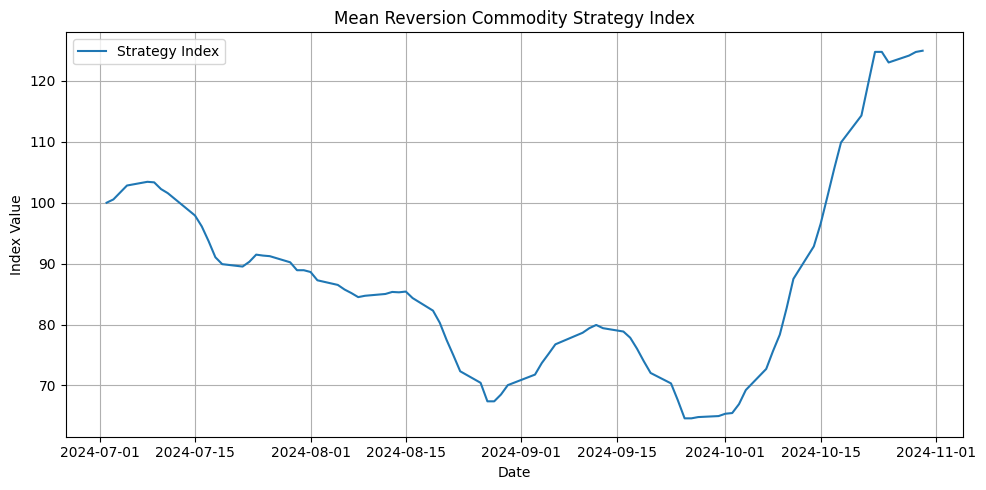

  Cumulative Return Annualized Volatility Sharpe Ratio Max Drawdown
0            24.95%                39.61%         1.88      -37.54%


In [246]:
# Affichage du track de l'indice
plt.figure(figsize=(10, 5))
plt.plot(index_series, label="Strategy Index")
plt.title("Mean Reversion Commodity Strategy Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Affichage des indicateurs
metrics = pd.DataFrame({
    "Cumulative Return": [f"{cumulative_return:.2%}"],
    "Annualized Volatility": [f"{volatility:.2%}"],
    "Sharpe Ratio": [f"{sharpe_ratio:.2f}"],
    "Max Drawdown": [f"{max_drawdown:.2%}"]
})

print(metrics)